In [2]:
from astropy.io import fits
import glob
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from astropy.table import Table, Column
import math
#%matplotlib nbagg

# Display rootname and filter in a specified folder

In [3]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/12340')
files = glob.glob('*.fits')
for im in files:
    hdu = fits.open(im)
    filter_name = hdu[0].header['filter']
    rootname = hdu[0].header['rootname']
    print(rootname,filter_name)
    hdu.close()
os.chdir('..')

iblq01cjq F160W
iblq01cuq F160W
iblq01d0q F160W
iblq02k6q F160W
iblq02kgq F160W
iblq02kmq F160W
iblq03e5q F160W
iblq03efq F160W
iblq03elq F160W
iblq04pnq F160W
iblq04pxq F160W
iblqa4q3q F160W
iblqa4qdq F160W
iblqa4qnq F160W


# Linear fit using np.polyfit

In [4]:
def linear_fit(x,y,deg):
    popt, pcov = np.polyfit(x, y, deg, cov=True)
    slope=popt[0]
    y_intercept=popt[1]
    perr = np.sqrt(np.diag(pcov))
    slope_err=perr[0]
    y_intercept_err=perr[1]
    #print(perr)
    polyfit_data=slope * a + y_intercept
    print('slope= ',slope,'y-intercept= ',y_intercept,'slope_error= ',slope_err,'y_intercept_error=',y_intercept_err)
    
    return slope,y_intercept,slope_err,y_intercept_err,polyfit_data

# Plotting the X&Yscale vs time/PA_V3

# Change Date to Decimal Date function

In [5]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

# Parameter Table of dataset
## All the following plots use data from this table!
## *Move the ref image to a seperate derectory for the correct naming in list

In [6]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test13/')
#def parameters_text_files(path):
os.system('mkdir refim')
os.system('mv ibcj01ttq_flt.fits refim')
filename_list = []
file_date_list = []
decimal_date_list = []
x_rms_list = []
y_rms_list = []
x_shift_list = []
y_shift_list = []
x_scale_list = []
y_scale_list = []
plate_scale_list= []
stars_list = []
xy_rotation_list = []
va_factor_list = []
x_rotation_list = []
y_rotation_list = []
PA_V3_list = []
proposalID = []
Skew_list =[]
expstart_list =[]
expend_list =[]
postarg1_list = []
postarg2_list = []

#os.chdir(path)
infile = r"tweakreg.log"
os.system('pwd')
keep_phrases = ["<ROT>"]
with open(infile) as f:
    f = f.readlines()
for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            Skew = line.split()[5]
            Skew=float(Skew)
            Skew_list.append(Skew)
            X_Rot=line.split()[7]
            Y_Rot=line.split()[9]
            X_Rot=X_Rot.replace(':','')
            X_Rot=float(X_Rot)
            x_rotation_list.append(X_Rot)
            Y_Rot=Y_Rot.replace(':','')
            Y_Rot=float(Y_Rot)
            y_rotation_list.append(Y_Rot)
            #print(X_Rot)
            #if X_Rot >= 300.00:
            #    X_Rot_deg = X_Rot - 360
            #    X_Rot_deg=math.radians(X_Rot_deg)
            #    x_rotation_list.append(X_Rot_deg)
            #elif X_Rot < 1:
            #    X_Rot = X_Rot
            #    X_Rot=math.radians(X_Rot)
            #    x_rotation_list.append(X_Rot)
            #if Y_Rot >= 300.00:
            #    Y_Rot_deg = Y_Rot - 360
            #    Y_Rot_deg=math.radians(Y_Rot_deg)
            #    y_rotation_list.append(Y_Rot_deg)
            #elif Y_Rot < 1:
            #    Y_Rot = Y_Rot
            #    Y_Rot=math.radians(Y_Rot)
            #    y_rotation_list.append(Y_Rot)
            #    #X_Rot=math.radians(X_Rot)
            #    #x_rotation_list.append(X_Rot)
            #    #Y_Rot=line.split()[9]
            #    #Y_Rot=Y_Rot.replace(':','')
            #    #Y_Rot=float(Y_Rot)
            #    ##Y_Rot=math.radians(Y_Rot)
            #    #y_rotation_list.append(Y_Rot)
            #    break
        
#print(x_rotation_list)
list_of_files=sorted(glob.glob('*fit.match'))
image=sorted(glob.glob('*_flt.fits'))
for file,im in zip(list_of_files, image):
    with open(file) as f:
        #print(file,im)
        hdu=fits.open(im)
        date=hdu[0].header['date-obs']
        date = date[:10]
        filename=hdu[0].header['filename']
        VA_factor=hdu[1].header['VAFACTOR']
        PA_V3 = hdu[0].header['PA_V3']
        proposal = hdu[0].header['PROPOSID']
        expstart = hdu[0].header['EXPSTART']
        expend = hdu[0].header['EXPEND']
        postarg1 = hdu[0].header['POSTARG1']
        postarg2 = hdu[0].header['POSTARG2']
        #print(postarg1,postarg2)
        
        table=np.loadtxt(file,usecols=(0,1,6,7))
        stars=sum(1 for _ in table)
        content1=f.readlines(1)
        content2=f.readlines(2)
        content3=f.readlines(3)
        content4=f.readlines(4)
        content5=f.readlines(5)
        content6=f.readlines(6)
        
        x_rms=content3[0].split()[5]
        y_rms=content3[0].split()[6]
        x_shift=content4[0].split()[5]
        y_shift=content4[0].split()[6]
        x_scale=content5[0].split()[5]
        y_scale=content5[0].split()[6]
        xy_rotation=content6[0].split()[5]
        
        
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        plate_scale=np.sqrt((x_scale**2)+(y_scale**2))
        x_rms=float(x_rms)
        y_rms=float(y_rms)
        x_shift=float(x_shift)
        y_shift=float(y_shift)
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        #xy_rotation=float(xy_rotation)
        
        x_rms_list=np.append(x_rms_list,x_rms)
        y_rms_list=np.append(y_rms_list,y_rms)
        x_shift_list=np.append(x_shift_list,x_shift)
        y_shift_list=np.append(y_shift_list,y_shift)
        x_scale_list=np.append(x_scale_list,x_scale)
        y_scale_list=np.append(y_scale_list,y_scale)
        plate_scale_list=np.append(plate_scale_list,plate_scale)
        #xy_rotation_list=np.append(xy_rotation_list,xy_rotation)
        file_date_list=np.append(file_date_list,date)
        filename_list=np.append(filename_list,filename)
        va_factor_list=np.append(va_factor_list, VA_factor)
        stars_list=np.append(stars_list, stars)
        PA_V3_list=np.append(PA_V3_list,PA_V3)
        proposalID=np.append(proposalID, proposal)
        expstart_list.append(expstart)
        expend_list.append(expend)
        postarg1_list.append(postarg1)
        postarg2_list.append(postarg2)
        
        file_date_list = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date_list] 
        hdu.close()

#for date in file_date_list:
#    decimal_date=toYearFraction(date)
#    decimal_date=format(decimal_date,'.4f')
#    decimal_date=float(decimal_date)
#    decimal_date_list.append(decimal_date)
#    decimal_date_list = [pd.to_datetime(d,format='float') for d in decimal_date_list]
    
    #print(decimal_date)        
        
        
#print(file_date_list)       
t1=Table()
t1['#Filename'] = filename_list
t1['Date-Obs'] = file_date_list
#t1['Date-Obs(decimal date)'] = decimal_date_list
t1['VA Factor'] = va_factor_list
t1['PA_V3 (Deg)'] = PA_V3_list
t1['POSTARG1 (")'] = postarg1_list
t1['POSTARG2 (")'] = postarg2_list
t1['Proposal ID'] = proposalID
t1['Number of stars'] = stars_list
t1['X rms (pixels)'] = x_rms_list
t1['Y rms (pixels)'] = y_rms_list
t1['X shift (pixels)'] = x_shift_list
t1['Y shift (pixels)'] = y_shift_list
t1['plate scale'] = plate_scale_list
t1['X scale (pixels)'] = x_scale_list
t1['Y scale (pixels)'] = y_scale_list
t1['X rotation (positive deg)'] = x_rotation_list
t1['Y rotation (positive deg)'] = y_rotation_list
t1['Skew'] = Skew_list
t1['EXPSTART(MJD)'] = expstart_list
#t1['EXPEND(MJD)'] = expend_list
#t1['plate scale'] = plate_scale_list
t1.write('tweakreg_parameters_neat.txt',format='ascii.fixed_width', overwrite=True)
t1.write('tweakreg_parameters.txt',format='ascii.basic', overwrite=True)
x = mdates.date2num(file_date_list)
x1 = mdates.date2num(decimal_date_list)
print('COMPLETE')

COMPLETE


# X&Y scale vs time/PA_V3

slope=  -8.808849420605176e-09 y-intercept=  0.9999831088605065 slope_error=  3.2923933165926862e-09 y_intercept_error= 4.132096586293059e-06
slope=  6.258914030570042e-08 y-intercept=  0.999968340514742 slope_error=  3.651283564777105e-08 y_intercept_error= 5.166489113834167e-06
slope=  -1.6863154493219996e-08 y-intercept=  1.0000260189502812 slope_error=  3.086752183812018e-09 y_intercept_error= 3.8740080345753605e-06
slope=  6.71878332158004e-08 y-intercept=  1.0000037408523852 slope_error=  3.865016283329132e-08 y_intercept_error= 5.468916395659548e-06


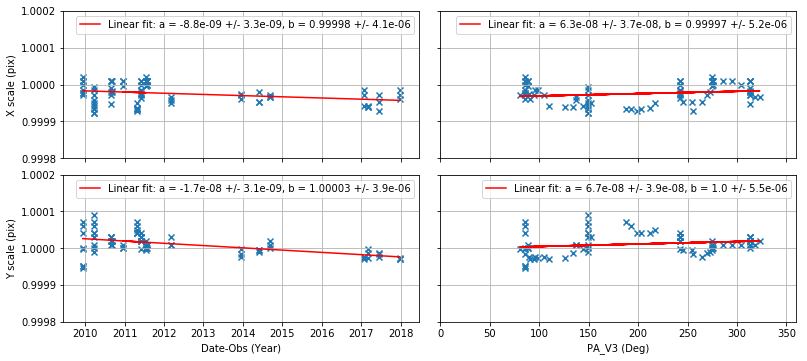

In [8]:
plt.clf()
fig, [(ax0, ax1), (ax2, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'

y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=10)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax0.scatter(file_date_list,x_scale_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x,polyfit_data,'red',label=line_fit)
ax0.set_ylabel('X scale (pix)')
ax0.set_ylim([0.9998,1.0002])
ax0.grid()
ax0.legend()
#ax0.axhline(1,color='black')
#ax0.annotate(('a = {} +/- {} \n b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)),xy=(x[55]+800,1.00017), xycoords='data',
#            size=12, ha='left', va='top',
#            bbox=dict(boxstyle='round', fc='w', alpha=0.5))

##Plot 2------------------------------------------------------------------------------------------------
##Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)

##RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

#ax1.set_xticks(np.arange(0, 370, 90.0))
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.set_xlim([0,360])
ax1.scatter(PA_V3_list,x_scale_list,marker=mark)
ax1.yaxis.set_major_formatter(y_formatter)
ax1.plot(PA_V3_list,polyfit_data,'red',label=line_fit)
ax1.legend()
ax1.grid()

#ax1.axhline(1,color='black')
#ax1.annotate(('a = {} +/- {} \n b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)),xy=(200,1.00017), xycoords='data',
#            size=12, ha='left', va='top',
#            bbox=dict(boxstyle='round', fc='w',alpha=0.5))

##Plot 3------------------------------------------------------------------------------------------------
##Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax2.scatter(file_date_list,y_scale_list,marker=mark)
ax2.plot(file_date_list,polyfit_data,'red',label=line_fit)
ax2.yaxis.set_major_formatter(y_formatter)
ax2.set_ylim([0.9998,1.0002])
ax2.set_xlabel('Date-Obs (Year)')
ax2.set_ylabel('Y scale (pix)')
ax2.grid()
ax2.legend()
#ax2.annotate(('a = {} +/- {} \n b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)),xy=(x[55]+800,1.00017), xycoords='data',
#            size=12, ha='left', va='top',
#            bbox=dict(boxstyle='round', fc='w', alpha=0.5))
#

##Plot 4------------------------------------------------------------------------------------------------
##Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)


#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax3.scatter(PA_V3_list,y_scale_list,marker=mark)
ax3.plot(PA_V3_list,polyfit_data,'red',label=line_fit)
ax3.yaxis.set_major_formatter(y_formatter)
ax3.set_xlabel('PA_V3 (Deg)')
#ax3.axhline(1,color='black')
ax3.grid()
#ax3.set_xticks(np.arange(0, 370, 90.0))
#ax3.annotate(('a = {} +/- {} \n b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)),xy=(200,1.00017), xycoords='data',
#            size=12, ha='left', va='top',
#            bbox=dict(boxstyle='round', fc='w',alpha=0.5))
ax3.legend(loc='upper right')
plt.savefig('xy_scale vs Date_obs & PA_V3 subplot.pdf')
plt.show()
plt.clf()



# Skew vs Date_obs & PA_V3

ibcj01u3q_flt.fits
starting skew in postive deg: 360.0
converted skew to original degree 0.0
converted skew to arcsec 0.0
converted skew" to radians 0.0
tangent of the skew 0.0
tan(skew)*512 in arcsec 0.0

ibcj01u9q_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent of the skew 3.49066079859891e-05
tan(skew)*512 in arcsec 0.01787218328882642

ibcj02dhq_flt.fits
starting skew in postive deg: 359.997
converted skew to original degree 0.002999999999985903
converted skew to arcsec 10.79999999994925
converted skew" to radians 5.235991199975395e-05
tangent of the skew 5.235991195190467e-05
tan(skew)*512 in arcsec 0.02680827491937519

ibcj02drq_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent

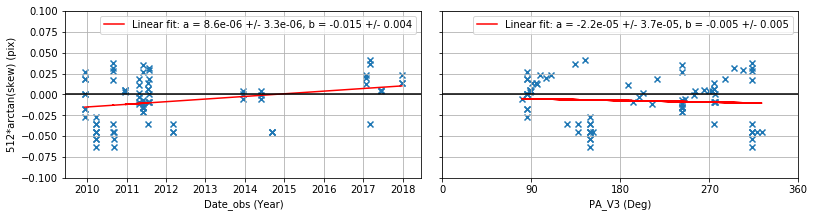

In [11]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
marker='x'


x_arcsec_list = []
tan_skew_list=[]
#print(Skew_list)

dates = file_date_list
for skew,name in zip(Skew_list,filename_list):
    print(name)
    print ('starting skew in postive deg:',skew)
    if skew > 340.00:
        orig_x = 360.00 - skew
        #print(skew)
    elif skew > 0 and skew < 340:
        orig_x = skew
        #print(skew)
    elif skew < -20.00:
        orig_x = skew + 360.00
        orig_x = 0.0 - orig_x 
        #print(skew)
    elif skew < 0 and skew > -20:
        orig_x = skew
        #print(orig_x)
    print('converted skew to original degree',orig_x)
    x_arcsec = orig_x * 3600
    x_arcsec = float(x_arcsec)
    print('converted skew to arcsec',x_arcsec)
    skew_radians = x_arcsec*0.00000484814
    print('converted skew" to radians',skew_radians)
    tan_skew = np.arctan(skew_radians)
    print('tangent of the skew',(tan_skew))
    skew_512 = tan_skew * 512
    print('tan(skew)*512 in arcsec',skew_512)
    #tan_skew = tan_skew*0.00000484814
    x_arcsec_list.append(x_arcsec)
    tan_skew_list.append(skew_512)
    print("")

    
#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,tan_skew_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=3)
slope_err=np.around(slope_err, decimals=7)
y_intercept_err=np.around(y_intercept_err, decimals=3)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax0.scatter(file_date_list,tan_skew_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x,polyfit_data,'red',label=line_fit)
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('512*arctan(skew) (pix)')
ax0.set_ylim([-0.1,0.1])
ax0.axhline(0,color='black')
ax0.grid()
ax0.legend()

#Plot 2------------------------------------------------------------------------------------------------
#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,tan_skew_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=6)
y_intercept=np.around(y_intercept, decimals=3)
slope_err=np.around(slope_err, decimals=6)
y_intercept_err=np.around(y_intercept_err, decimals=3)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.scatter(PA_V3_list, tan_skew_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
ax1.grid()
ax1.legend()
#plt.savefig('IR Skew vs Date_obs & PA_V3')

plt.show()
plt.clf()



ibcj01u3q_flt.fits
starting skew in postive deg: 360.0
converted skew to original degree 0.0
converted skew to arcsec 0.0
converted skew" to radians 0.0
tangent of the skew 0.0
tan(skew)*512 in arcsec 0.0

ibcj01u9q_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent of the skew 3.49066079859891e-05
tan(skew)*512 in arcsec 0.01787218328882642

ibcj02dhq_flt.fits
starting skew in postive deg: 359.997
converted skew to original degree 0.002999999999985903
converted skew to arcsec 10.79999999994925
converted skew" to radians 5.235991199975395e-05
tangent of the skew 5.235991195190467e-05
tan(skew)*512 in arcsec 0.02680827491937519

ibcj02drq_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent

converted skew to arcsec -2.4594587999999997
converted skew" to radians -1.1923800586631998e-05
tangent of the skew -1.1923800586066902e-05
tan(skew)*512 in arcsec -0.006104985900066254

ich810jnq_flt.fits
starting skew in postive deg: -0.000122299
converted skew to original degree -0.000122299
converted skew to arcsec -0.4402764
converted skew" to radians -2.134521625896e-06
tangent of the skew -2.1345216258927584e-06
tan(skew)*512 in arcsec -0.0010928750724570923

ich811jpq_flt.fits
starting skew in postive deg: 0.000409872
converted skew to original degree 0.000409872
converted skew to arcsec 1.4755391999999998
converted skew" to radians 7.153620617087998e-06
tangent of the skew 7.1536206169659714e-06
tan(skew)*512 in arcsec 0.0036626537558865774

ich812jlq_flt.fits
starting skew in postive deg: -0.000571313
converted skew to original degree -0.000571313
converted skew to arcsec -2.0567268000000003
converted skew" to radians -9.971299468152e-06
tangent of the skew -9.97129946782153e

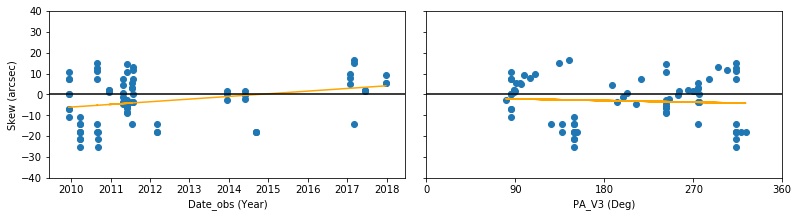

(array([ 8.64463484e-06, -1.52431682e-02]), array([0.05376487]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
8.644634843667889e-06 -0.0152431681598736 0.053764872646752226
0.01102155831788486
2014-09-06 00:00:00
(array([-2.17842875e-05, -5.26423617e-03]), array([0.05835805]), 2, array([1.34344294, 0.44177037]), 1.7541523789077473e-14)
-2.1784287549833693e-05 -0.005264236167668037 0.05835805257862702


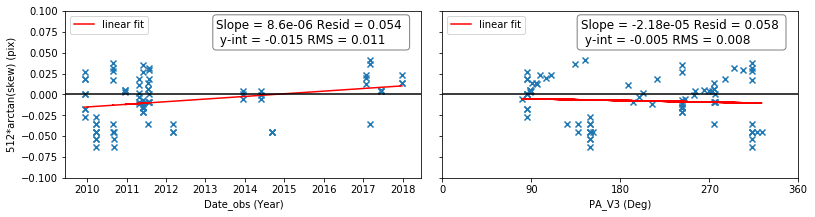

In [10]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)

#table = np.loadtxt('tweakreg_parameters.txt',usecols=(15,16,17,18,4))
#table1 = np.loadtxt('tweakreg_parameters.txt',usecols=(1),dtype='str')
#print(table1)
#print(table)
x_arcsec_list = []
tan_skew_list=[]
#print(Skew_list)

dates = file_date_list
for skew,name in zip(Skew_list,filename_list):
    print(name)
    print ('starting skew in postive deg:',skew)
    if skew > 340.00:
        orig_x = 360.00 - skew
        #print(skew)
    elif skew > 0 and skew < 340:
        orig_x = skew
        #print(skew)
    elif skew < -20.00:
        orig_x = skew + 360.00
        orig_x = 0.0 - orig_x 
        #print(skew)
    elif skew < 0 and skew > -20:
        orig_x = skew
        #print(orig_x)
    print('converted skew to original degree',orig_x)
    x_arcsec = orig_x * 3600
    x_arcsec = float(x_arcsec)
    print('converted skew to arcsec',x_arcsec)
    skew_radians = x_arcsec*0.00000484814
    print('converted skew" to radians',skew_radians)
    tan_skew = np.arctan(skew_radians)
    print('tangent of the skew',(tan_skew))
    skew_512 = tan_skew * 512
    print('tan(skew)*512 in arcsec',skew_512)
    #tan_skew = tan_skew*0.00000484814
    x_arcsec_list.append(x_arcsec)
    tan_skew_list.append(skew_512)
    print("")
    #print('tan(skew)',tan_skew)
    #print('skew converted to arcsec', x_arcsec)
    #print('')
    #x_arcsec_list.append(x_arcsec)
    #tan_skew_list.append(tan_skew)
#print(x)
#print(tan_skew_list)
ax0.scatter(file_date_list,x_arcsec_list)
polyfit=np.polyfit(x,x_arcsec_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
#print(polyfit_data)
#print(x)
#print('y1=',polyfit_data[0],'y2=', polyfit_data[-1])
#print('y20=',polyfit_data[20],'x20',x[20])
#print('x1=',x[0],'x2=', x[-1])
y1=polyfit_data[0]
y2=polyfit_data[-1]
x1=x[0]
x2=x[-1]
slope = (y2-y1)/(x2-x1)
print('Slope=',slope,'arcsec/Year')
b=-(slope*polyfit_data[20]) + x[20]
print(b)
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('Skew (arcsec)')
ax0.set_ylim([-40,40])
ax0.axhline(0,color='black')

ax1.scatter(PA_V3_list, x_arcsec_list)
polyfit=np.polyfit(PA_V3_list,x_arcsec_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
plt.savefig('IR Skew vs Date_obs & PA_V3')
plt.show()
plt.clf()


#-------------------------------------------------------------------------------------
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'

#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,tan_skew_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#Calculate slope and y-intercept
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#slope=np.around(slope,decimals=7)
#print('Slope=',slope,'arcsec/Year')
#b=-(slope*x2) + y2
#print(b)
#b = np.around(b,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)


#Plot subplot 1
ax0.scatter(file_date_list,tan_skew_list,marker=mark)
ax0.plot(x, polyfit_data, 'red')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('512*arctan(skew) (pix)')
ax0.set_ylim([-0.1,0.1])
ax0.axhline(0,color='black')
ax0.legend(['linear fit'],loc='upper left')
print(file_date_list[66])
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.091), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))


#Calculate linear fit
#polyfit=np.polyfit(PA_V3_list,tan_skew_list,1)
#polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
polyfit=np.polyfit(a,tan_skew_list,1,full=True)
print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)
#polyfit_data=((polyfit[0]*a + polyfit[1]))
#slope=polyfit[0]
#y_int=polyfit[1]
#slope=np.around(slope, decimals=5)
#y_int=np.around(y_int, decimals=3)
#polyfit_resid=np.around(polyfit_resid,decimals=3)

#Calculate slope and y-intercept
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#slope=np.around(slope,decimals=7)
##print('Slope=',slope,'arcsec/Year')
#b=-(slope*x2) + y2
##print(b)
#b = np.around(b,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
rms=np.around(rms, decimals=3)

#Plot subplot 2
ax1.scatter(PA_V3_list, tan_skew_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
ax1.legend(['linear fit'],loc='upper left')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(140,0.091), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w',alpha=0.5))
plt.savefig('Skew (pix) vs Date_obs & PA_V3')
plt.show()
plt.clf()
#print('filename, 512*tan_skew, date, PA_V3, skew(arcsec)')
#for i,j,k,roll,arcsec in zip(filename_list,tan_skew_list,file_date_list,PA_V3_list,x_arcsec_list):
#    if j > 0.10:
#        print(i,j,k,roll,arcsec)
#    elif j < -0.10:
#        print(i,j,k,roll,arcsec)

In [156]:
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

original skew 360.0
skew in radinas 6.283185307179586
arctan of skew 1.4129651365067377
original skew 359.998
skew in radinas 6.283150400594546
arctan of skew 1.4129642741515311
original skew 359.997
skew in radinas 6.283132947302027
arctan of skew 1.4129638429704234
original skew 359.998
skew in radinas 6.283150400594546
arctan of skew 1.4129642741515311
original skew -3.62258e-06
skew in radinas -6.322594841689618e-08
arctan of skew -6.32259484168961e-08
original skew -359.998
skew in radinas -6.283150400594546
arctan of skew -1.4129642741515311
original skew -359.997
skew in radinas -6.283132947302027
arctan of skew -1.4129638429704234
original skew -359.998
skew in radinas -6.283150400594546
arctan of skew -1.4129642741515311
original skew -359.995
skew in radinas -6.283098040716987
arctan of skew -1.4129629806011992
original skew -359.996
skew in radinas -6.283115494009507
arctan of skew -1.4129634117869794
original skew -359.997
skew in radinas -6.283132947302027
arctan of skew -

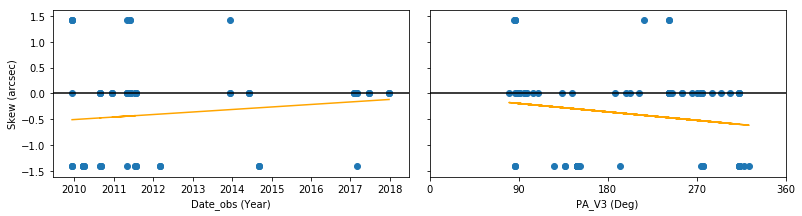

In [27]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)

skewlist_arctan=[]

for skew in Skew_list:
    skew_in_radians=np.deg2rad(skew)
    print('original skew',skew)
    print('skew in radinas', skew_in_radians)
    arctan_of_skew=np.arctan(skew_in_radians)
    print('arctan of skew', arctan_of_skew)
    skewlist_arctan.append(arctan_of_skew)

x1_value=file_date_list
x2_value=PA_V3_list
y_value=skewlist_arctan

ax0.scatter(x1_value,y_value)
polyfit=np.polyfit(x,y_value,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
y1=polyfit_data[0]
y2=polyfit_data[-1]
print('Slope=',slope,'arcsec/Year')
b=-(slope*polyfit_data[20]) + x[20]
print(b)
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('Skew (arcsec)')
#ax0.set_ylim([-40,40])
ax0.axhline(0,color='black')



ax1.scatter(x2_value, y_value)
polyfit=np.polyfit(x2_value,y_value,1)
polyfit_data=((polyfit[0]*x2_value + polyfit[1]))
ax1.plot(x2_value, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
#plt.savefig('IR Skew vs Date_obs & PA_V3')
plt.show()
plt.clf()


#-------------------------------------------------------------------------------------
#fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
#fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
#
#ax0.scatter(file_date_list,tan_skew_list)
#polyfit=np.polyfit(x,tan_skew_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
##print(polyfit_data)
##print(x)
##print('y1=',polyfit_data[0],'y2=', polyfit_data[-1])
##print('y20=',polyfit_data[20],'x20',x[20])
##print('x1=',x[0],'x2=', x[-1])
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#print('Slope=',slope,'arcsec/Year')
#b=-(slope*polyfit_data[20]) + x[20]
#print(b)
#ax0.plot(x, polyfit_data, 'orange')
#ax0.set_xlabel('Date_obs (Year)')
#ax0.set_ylabel('512*tan(skew) (pix)')
#ax0.set_ylim([-0.1,0.1])
#ax0.axhline(0,color='black')
#
#ax1.scatter(PA_V3_list, tan_skew_list)
#polyfit=np.polyfit(PA_V3_list,tan_skew_list,1)
#polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
#ax1.plot(PA_V3_list, polyfit_data, 'orange')
#ax1.set_xlabel('PA_V3 (Deg)')
#ax1.set_xticks(np.arange(0, 370, 90.0))
#ax1.axhline(0,color='black')
#plt.savefig('Skew (pix) vs Date_obs & PA_V3')
#plt.show()
#plt.clf()
#print('filename, 512*tan_skew, date, PA_V3, skew(arcsec)')
#for i,j,k,roll,arcsec in zip(filename_list,tan_skew_list,file_date_list,PA_V3_list,x_arcsec_list):
#    if j > 0.10:
#        print(i,j,k,roll,arcsec)
#    elif j < -0.10:
#        print(i,j,k,roll,arcsec)

# X&Y RMS vs Date_Obs & PA_V3

slope=  5.4366325059360665e-06 y-intercept=  0.06955216541048415 slope_error=  3.6973636172767177e-07 y_intercept_error= 0.0004640351899706933
slope=  4.44488493991078e-06 y-intercept=  0.06396667840692956 slope_error=  7.723373891705125e-07 y_intercept_error= 0.0009693169625798947


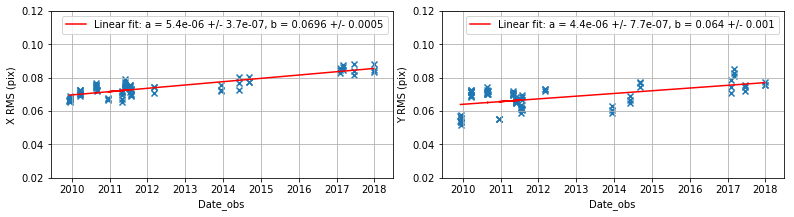

In [453]:
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout(pad=5, w_pad=1.8, h_pad=.625)
mark='x'

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_rms_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=4)
slope_err=np.around(slope_err, decimals=8)
y_intercept_err=np.around(y_intercept_err, decimals=4)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

#Plot 1
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax0.scatter(file_date_list,x_rms_list,marker=mark)
ax0.plot(x, polyfit_data, 'red',label=line_fit)
ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
ax0.set_ylim([0.02,0.12])
#ax0.axhline(0.07,color='black')
ax0.grid()
ax0.legend()

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_rms_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=4)
slope_err=np.around(slope_err, decimals=8)
y_intercept_err=np.around(y_intercept_err, decimals=4)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.scatter(file_date_list, y_rms_list,marker=mark)
ax1.plot(file_date_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('Date_obs')
ax1.set_ylabel('Y RMS (pix)')
ax1.set_ylim([0.02,0.12])
ax1.grid()
ax1.legend()

##plt.savefig('X&Y rms vs Date_obs & PA_V3')
plt.show()
plt.clf()


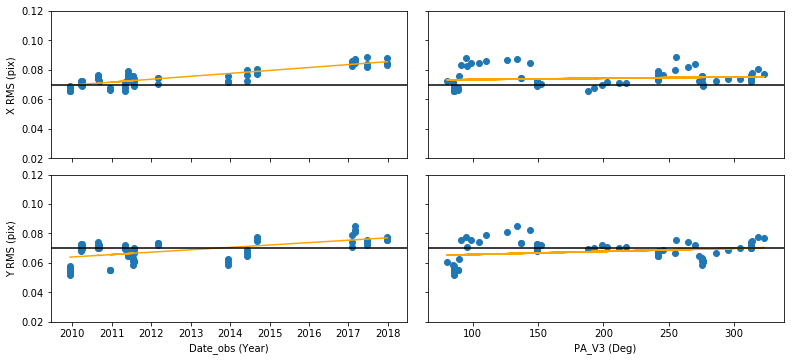

0.07426772151898733 0.0678220253164557 2720.215189873418


In [32]:
fig, [(ax0,ax1), (ax2,ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)


ax0.scatter(file_date_list,x_rms_list)
polyfit=np.polyfit(x,x_rms_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
#ax0.axis((55000,58400,-50,50))
#plt.axis((55250,55300,-27,15))
#plt.axis((55170,55190,-27,15))
#plt.axis((55100,55900,-30,30))
#plt.axis((55275,55282,-30,30))
#ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
ax0.set_ylim([0.02,0.12])
#ax0.set_xlim(['01-01-2010','01-01-2013'])
ax0.axhline(0.07,color='black')

#plt.clf()
ax1.scatter(PA_V3_list, x_rms_list)
polyfit=np.polyfit(PA_V3_list,x_rms_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.axhline(0.07,color='black')
#plt.savefig('X&Y rms vs Date_obs & PA_V3')
#plt.show()
#plt.clf()

ax2.scatter(file_date_list,y_rms_list)
polyfit=np.polyfit(x,y_rms_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax2.plot(x, polyfit_data, 'orange')
ax2.set_ylim([0.02,0.12])
#ax0.axis((55000,58400,-50,50))
#plt.axis((55250,55300,-27,15))
#plt.axis((55170,55190,-27,15))
#plt.axis((55100,55900,-30,30))
#plt.axis((55275,55282,-30,30))
ax2.set_xlabel('Date_obs (Year)')
ax2.set_ylabel('Y RMS (pix)')
#ax0.set_ylim([-50,50])
ax2.axhline(0.07,color='black')

#plt.clf()
ax3.scatter(PA_V3_list, y_rms_list)
polyfit=np.polyfit(PA_V3_list,y_rms_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax3.plot(PA_V3_list, polyfit_data, 'orange')
ax3.set_xlabel('PA_V3 (Deg)')
ax3.axhline(0.07,color='black')
plt.savefig('X&Y rms vs Date_obs & PA_V3')
plt.show()
plt.clf()

average_xrms= np.mean(x_rms_list)
average_yrms= np.mean(y_rms_list)
average_stars= np.mean(stars_list)
print(average_xrms,average_yrms,average_stars)

(array([5.43663251e-06, 6.95521654e-02]), array([0.00066646]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
5.4366325059360665e-06 0.06955216541048415 0.0006664558172426275
0.07443127154177899
(array([4.44488494e-06, 6.39666784e-02]), array([0.00290805]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
4.44488493991078e-06 0.06396667840692956 0.002908045222048944
0.06794176435760775


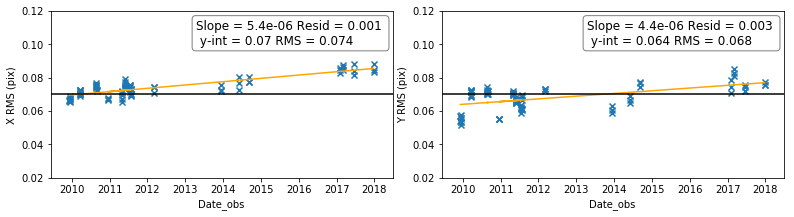

In [236]:
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout(pad=5, w_pad=1.8, h_pad=.625)
mark='x'

#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,x_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

#Plot 1
ax0.scatter(file_date_list,x_rms_list,marker=mark)
#polyfit=np.polyfit(x,x_rms_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
ax0.set_ylim([0.02,0.12])
ax0.axhline(0.07,color='black')
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.115), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))


#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,y_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

#Plot 2
ax1.scatter(file_date_list, y_rms_list,marker=mark)
#polyfit=np.polyfit(x,y_rms_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
ax1.plot(file_date_list, polyfit_data, 'orange')
ax1.set_xlabel('Date_obs')
ax1.set_ylabel('Y RMS (pix)')
ax1.set_ylim([0.02,0.12])
ax1.axhline(0.07,color='black')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.115), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))
#plt.savefig('X&Y rms vs Date_obs & PA_V3')
plt.show()
plt.clf()


# Plate Scale vs Date-Obs/PA_V3

slope=  -1.8153054904771813e-08 y-intercept=  1.4142200173885642 slope_error=  2.894644131846035e-09 y_intercept_error= 3.632904086961481e-06
slope=  9.176548927871323e-08 y-intercept=  1.414193821496053 slope_error=  3.712067507263195e-08 y_intercept_error= 5.252497108441805e-06


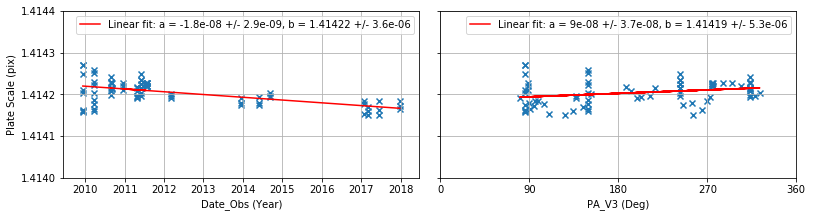

In [9]:
#os.chdir('./tweakreg_test12/')
plt.clf()
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,plate_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)


line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)   
ax0.scatter(file_date_list,plate_scale_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x, polyfit_data, 'red',label=line_fit)
ax0.set_ylim([1.414,1.4144])
ax0.set_xlabel('Date_Obs (Year)')
ax0.set_ylabel('Plate Scale (pix)')
ax0.grid()
ax0.legend()


#Plot 2 -----------------------------------------------------------------------------

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,plate_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=8)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)


line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)   
ax1.scatter(PA_V3_list, plate_scale_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
plt.grid()
plt.legend()
#plt.savefig('Plate Scale vs Date_obs & PA_V3')
plt.show()
plt.clf()



(array([-1.81530549e-08,  1.41422002e+00]), array([4.08486205e-08]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
-1.8153054904771813e-08 1.4142200173885642 4.084862050035556e-08
1.4142042721220465
(array([2.11236892e-05, 6.54163960e-02]), array([0.00394369]), 2, array([1.34344294, 0.44177037]), 1.7541523789077473e-14)
2.112368918797677e-05 0.06541639601049402 0.003943688772339948
0.06784522040641994


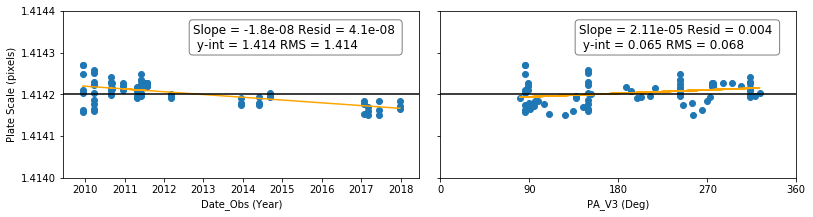

In [346]:
#os.chdir('./tweakreg_test12/')
plt.clf()
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#Plot 1 -----------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,plate_scale_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=9)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=9)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

   
ax0.scatter(file_date_list,plate_scale_list)
ax0.yaxis.set_major_formatter(y_formatter)
polyfit=np.polyfit(x,plate_scale_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
ax0.set_ylim([1.414,1.4144])
#ax0.set_xlim(['01-01-2010','12-31-2013'])
ax0.set_xlabel('Date_Obs (Year)')
ax0.set_ylabel('Plate Scale (pixels)')
ax0.axhline(1.4142,color='black')
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+200,1.41437), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))

#Plot 2 -----------------------------------------------------------------------------

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
polyfit=np.polyfit(a,y_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

ax1.scatter(PA_V3_list, plate_scale_list)
polyfit=np.polyfit(PA_V3_list,plate_scale_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(1.4142,color='black')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(140,1.41437), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w',alpha=0.5))
plt.savefig('Plate Scale vs Date_obs & PA_V3')
plt.show()
plt.clf()


#dates = file_date_list
##print(dates)
##print(date_obs_list)
##print(PAV3_list)
##print(x_rot_list)
##print(x)
##plt.scatter(expstart_list[:27],x_arcsec_list[:27])
##plt.plot(expstart_list[:27],x_arcsec_list[:27])
#ax0.scatter(file_date_list,x_arcsec_list)
#polyfit=np.polyfit(x,x_arcsec_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
#ax0.plot(x, polyfit_data, 'orange')
##ax0.axis((55000,58400,-50,50))
##plt.axis((55250,55300,-27,15))
##plt.axis((55170,55190,-27,15))
##plt.axis((55100,55900,-30,30))
##plt.axis((55275,55282,-30,30))
#ax0.set_xlabel('Date_obs (Year)')
#ax0.set_ylabel('Skew (arcsec)')
#ax0.set_ylim([-50,50])
#ax0.axhline(0,color='black')
#
##plt.clf()
#ax1.scatter(PAV3_list, x_arcsec_list)
#polyfit=np.polyfit(PAV3_list,x_arcsec_list,1)
#polyfit_data=((polyfit[0]*(PAV3_list) + polyfit[1]))
#ax1.plot(PAV3_list, polyfit_data, 'orange')
#ax1.set_xlabel('PA_V3 (Deg)')
#ax1.axhline(0,color='black')
#plt.savefig('IR Skew vs Date_obs & PA_V3')
#plt.show()
#plt.clf()

# X&Y rotation vs. Year/PA_V3

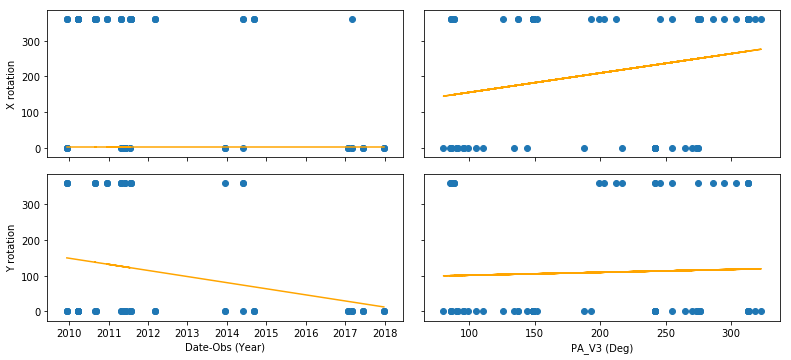

In [46]:
fig, [(ax0, ax2), (ax1, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
xscale_by_VA_factor = x_scale_list*va_factor_list
#print(xscale_by_VA_factor)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#ax.yaxis.set_major_formatter(y_formatter)

ax0.scatter(file_date_list,x_rotation_list)
ax0.yaxis.set_major_formatter(y_formatter)
xrot_polyfit=np.polyfit(x,x_rotation_list,1)
xrot_polyfit_data=((xrot_polyfit[0]*x + xrot_polyfit[1]))
xrot_pd = ((xrot_polyfit_data[0] - xrot_polyfit_data[-1])/ xrot_polyfit_data[-1]) * 100
ax0.plot(x,xscale_polyfit_data,'orange')
ax0.set_ylabel('X rotation')
#ax0.set_ylim([0.9998,1.0002])


ax1.scatter(file_date_list,y_rotation_list)
ax1.yaxis.set_major_formatter(y_formatter)
yrot_list_polyfit=np.polyfit(x,y_rotation_list,1)
yrot_list_polyfit_data=((yrot_list_polyfit[0]*x + yrot_list_polyfit[1]))
yrot_list_pd = ((yrot_list_polyfit_data[0] - yrot_list_polyfit_data[-1])/ yrot_list_polyfit_data[-1]) * 100
ax1.plot(x,yrot_list_polyfit_data,'orange')
ax1.set_ylabel('Y rotation')
ax1.set_xlabel('Date-Obs (Year)')
#ax1.set_ylim([0.9998,1.0002])

ax2.scatter(PA_V3_list,x_rotation_list)
xrot_polyfit=np.polyfit(PA_V3_list,x_rotation_list,1)
xrot_polyfit_data=((xrot_polyfit[0]*PA_V3_list + xrot_polyfit[1]))
xrot_pd = ((xrot_polyfit_data[0] - xrot_polyfit_data[-1])/ xrot_polyfit_data[-1]) * 100
ax2.plot(PA_V3_list,xrot_polyfit_data,'orange')

ax3.scatter(PA_V3_list,y_rotation_list)
ax3.set_xlabel('PA_V3 (Deg)')
yrot_list_polyfit=np.polyfit(PA_V3_list,y_rotation_list,1)
yrot_list_polyfit_data=((yrot_list_polyfit[0]*PA_V3_list + yrot_list_polyfit[1]))
yrot_list_pd = ((yrot_list_polyfit_data[0] - yrot_list_polyfit_data[-1])/ yrot_list_polyfit_data[-1]) * 100      
ax3.plot(PA_V3_list,yrot_list_polyfit_data,'orange')
plt.savefig('xy_rotation subplot.png')
plt.show()
plt.clf()


In [47]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test11/')
infile = r"tweakreg.log"


ROT_X = []
ROT_Y = []
#keep_phrases = ["ROT_X","ROT_Y"]
#keep_phrases = ["<ROT>","Computed  general  fit "]
keep_phrases = ["<ROT>"]
with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            #print(line)
            X_Rot=line.split()[7]
            X_Rot=X_Rot.replace(':','')
            X_Rot=X_Rot.replace('\n','')
            print(X_Rot)
            ROT_X.append(X_Rot)
            Y_Rot=line.split()[9]
            Y_Rot=Y_Rot.replace(':','')
            Y_Rot=Y_Rot.replace('\n','')
            print(Y_Rot)
            ROT_Y.append(Y_Rot)
            #lines.append(line)
            break

t1=Table()
t1['X_Rotation'] = ROT_X
t1['Y_Rotation'] = ROT_Y
t1.write('Rotation_parameters.txt',format='ascii.fixed_width', overwrite=True)




#
#cleanLines = []
#with open("Rotation_parameters.txt", "r") as file:
#    for line in file:
#        cleanedLine = line.strip()
#        cleanedLine = cleanedLine.replace('Line', '')
#        cleanedLine = cleanedLine.replace('||', '')
#        cleanedLine = cleanedLine.replace('  ROT_Y', '      ROT_Y')
#        #if cleanedLine = ''
#        #cleanedLine = cleanedLine.strip('') 
#        print(cleanedLine)
#        cleanLines.append(cleanedLine)
#        #print(cleanedLine)
#        #if cleanedLine: # is not empty
#            #print(cleanedLine)
##print(cleanLines) 
#
#t2=Table()
#t2['Log File Info'] = cleanLines
#t2['Log File Info'].format = '<'
#t2.pprint(align=['<'])
#t2.write('New_Rotation_parameters.txt',format='ascii.fixed_width', overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test11/'

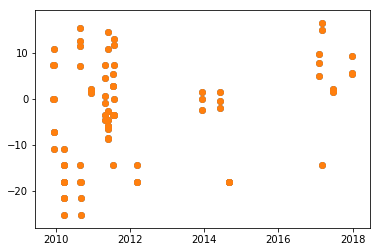

In [160]:
plt.scatter(decimal_date_list,x_arcsec_list)
plt.show()
